<a href="https://colab.research.google.com/github/KaydeeJR/ML_Sales_Prediction/blob/EDA/EDA_merged_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **<u>EDA PERFORMED ON THE MERGED DATASET</u>**

**Accessing the dataset from my Google drive**

In [101]:
from google.colab import drive
drive.mount("/content/drive")
# Change to specific directory in google drive
%cd /content/drive/MyDrive/Datasets/PharmaSalesCSV/
# To list files in directory => !ls
file_path_to_merged_dataset = "merged_train_sales_store.csv"
file_path_to_test_set="merged_test_sales_store.csv"
import pandas as pd
import warnings
# DtypeWarning for pandas dataframe
warnings.filterwarnings("ignore")
merged_train_dataset = pd.read_csv(file_path_to_merged_dataset,index_col="Unnamed: 0",low_memory=False)
merged_sales_test = pd.read_csv(file_path_to_test_set,index_col="Unnamed: 0", low_memory=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Datasets/PharmaSalesCSV




---



---



# **DESCRIBING DATASET**

In [2]:
merged_train_dataset.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1
1017208,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,2013-01-01,0,0,0,0,a,1


In [3]:
merged_sales_test.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41342,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",37664.0,3.0,2015-08-05,1.0,1.0,0,1.0
41343,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",38520.0,2.0,2015-08-04,1.0,1.0,0,1.0
41344,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",39376.0,1.0,2015-08-03,1.0,1.0,0,1.0
41345,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",40232.0,7.0,2015-08-02,0.0,0.0,0,1.0
41346,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",41088.0,6.0,2015-08-01,1.0,0.0,0,1.0


In [106]:
# convert Date column to datetime object
merged_train_dataset['Date']=pd.to_datetime(merged_train_dataset['Date'])
merged_sales_test['Date'] = pd.to_datetime(merged_sales_test['Date'])

In [5]:
merged_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1014567 non-null  float64       
 4   CompetitionOpenSinceMonth  693861 non-null   float64       
 5   CompetitionOpenSinceYear   693861 non-null   float64       
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            509178 non-null   float64       
 8   Promo2SinceYear            509178 non-null   float64       
 9   PromoInterval              509178 non-null   object        
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

In [6]:
merged_train_dataset.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [7]:
merged_sales_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41347 entries, 0 to 41346
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41347 non-null  int64         
 1   StoreType                  41347 non-null  object        
 2   Assortment                 41347 non-null  object        
 3   CompetitionDistance        41250 non-null  float64       
 4   CompetitionOpenSinceMonth  26094 non-null  float64       
 5   CompetitionOpenSinceYear   26094 non-null  float64       
 6   Promo2                     41347 non-null  int64         
 7   Promo2SinceWeek            23930 non-null  float64       
 8   Promo2SinceYear            23930 non-null  float64       
 9   PromoInterval              23930 non-null  object        
 10  Id                         41088 non-null  float64       
 11  DayOfWeek                  41088 non-null  float64       
 12  Date

In [8]:
merged_train_dataset.nunique()

Store                         1115
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
dtype: int64

In [9]:
merged_sales_test.nunique()

Store                         1115
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
Id                           41088
DayOfWeek                        7
Date                            48
Open                             2
Promo                            2
StateHoliday                     2
SchoolHoliday                    2
dtype: int64

## **VISUALIZING MISSING VALUES**

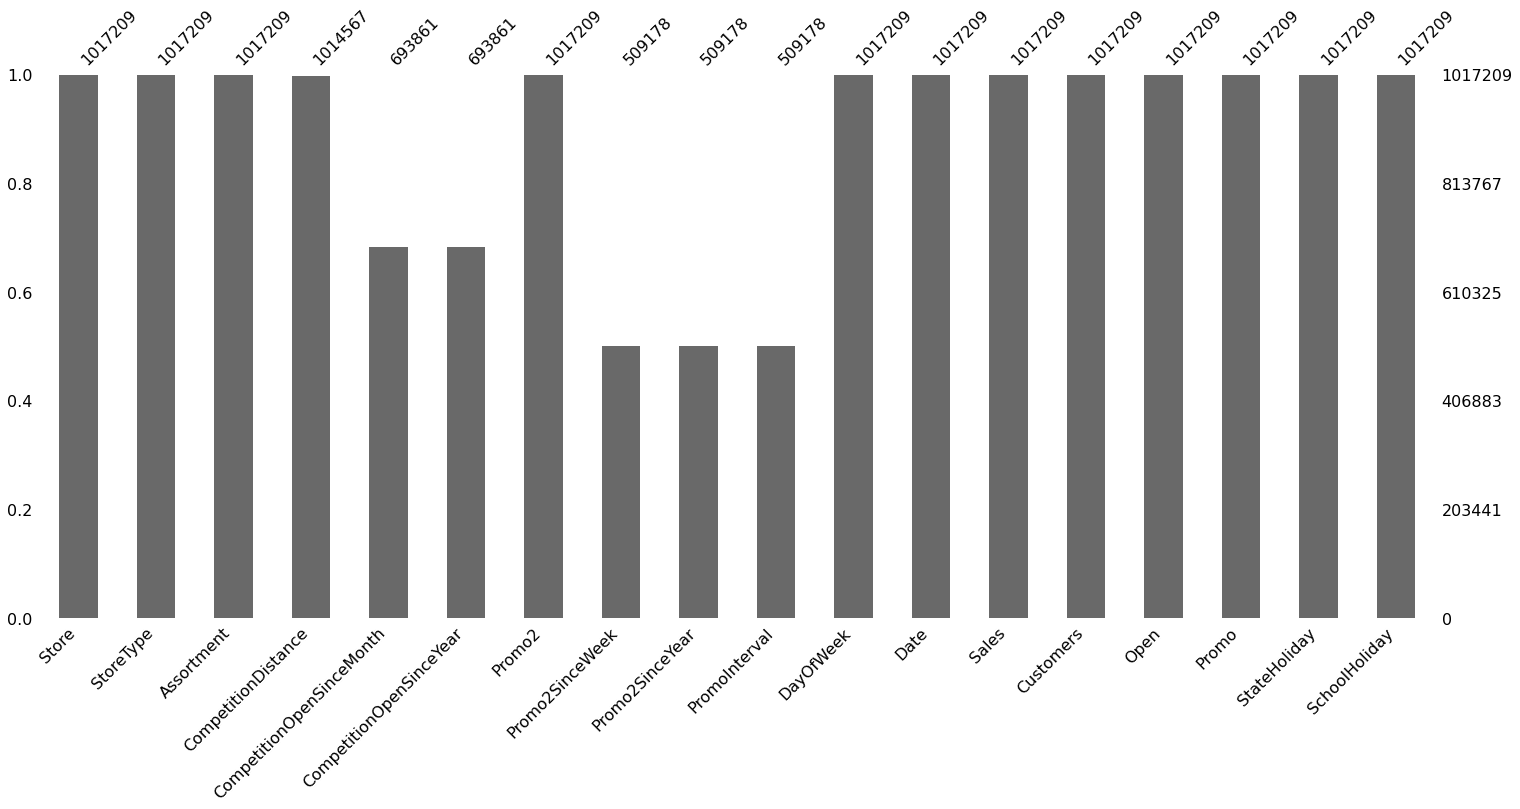

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(merged_train_dataset, labels=list(merged_train_dataset.columns))
plt.show()

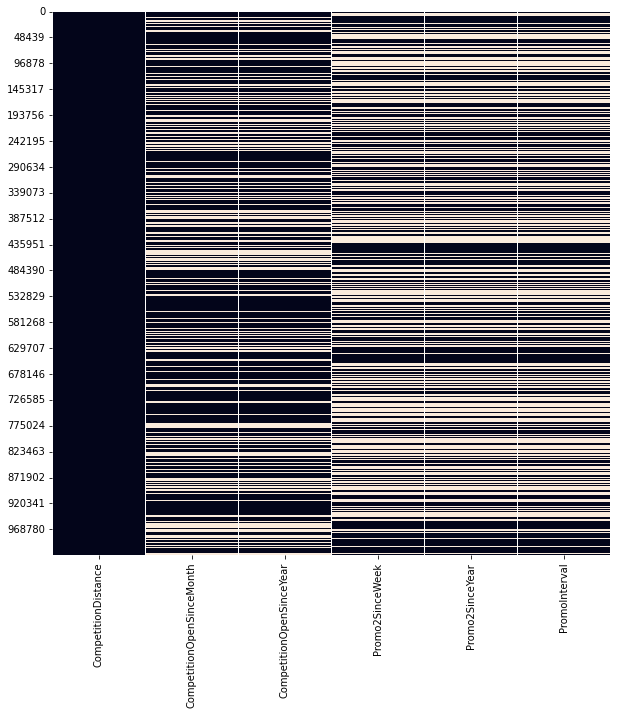

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
columns_with_null = merged_train_dataset.columns[merged_train_dataset.isna().any()].tolist()
missing_values = sns.heatmap(merged_train_dataset[columns_with_null].isnull(), cbar=False)
missing_values.figure.set_size_inches(10,10)
plt.show()

In [ ]:
print(columns_with_null)

['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [ ]:
test_columns_with_null = merged_sales_test.columns[merged_sales_test.isna().any()].tolist()
print(test_columns_with_null)

['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Id', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


## **WEEKDAYS & WEEKENDS**

In [ ]:
merged_train_dataset["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6])

## **HOLIDAYS**

In [ ]:
years_list = list(merged_train_dataset['Date'].dt.year.value_counts().index)

In [ ]:
import holidays

In [ ]:
holiday_dict = {}
# get unique dates in date column
unique_dates = merged_train_dataset["Date"].dt.date.value_counts().index
# get number of years in dataset
for y in range(len(years_list)):
    for k, v in holidays.US(years=years_list[y]).items(): # k = dates, v = holiday name
        if k in unique_dates:
            holiday_dict[k] = v

## **RETAIL ASSORTMENT AND SALES**

<Figure size 720x720 with 0 Axes>

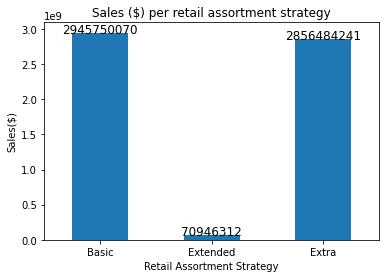

In [69]:
import matplotlib.pyplot as plt
# Retail Assortment strategies:
# a = basic
# b = extra
# c = extended
plt.figure(figsize=(10,10))
assortment_labels =["Basic","Extended","Extra"]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
assort_sales_DF = merged_train_dataset.groupby("Assortment").sum()["Sales"].to_frame()
assort_sales_axis = assort_sales_DF.plot(kind='bar',legend=False)
assort_sales_axis.set_xlabel('Retail Assortment Strategy')
assort_sales_axis.set_ylabel('Sales($)')
assort_sales_axis.set_title('Sales ($) per retail assortment strategy')
assort_sales_axis.set_xticklabels(assortment_labels,rotation=0)
for index in range(len(assort_sales_DF["Sales"])):
    # plot text at coordinates
    assort_sales_axis.text(index, (assort_sales_DF["Sales"].values[index])+10^9,
            assort_sales_DF["Sales"].values[index],
            horizontalalignment='center', fontsize=12)
plt.show()

# **PREPROCESSING**

In [ ]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 7.5 MB/s 


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from pyts.preprocessing import InterpolationImputer

In [ ]:
# preprocessing actions -> all features are numeric
import numpy as np
x_DF = merged_train_dataset.drop("Sales",axis=1)
y_DF = np.array(merged_train_dataset['Sales'])
# Saving feature names
features_list = list(merged_train_dataset.columns)
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(
    steps=[('simp_imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
           ('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_cols = x_DF.drop("Store", axis=1).select_dtypes(exclude=['object', 'datetime64']).columns
category_cols = x_DF.select_dtypes(exclude=['int64', 'float64', 'datetime64']).columns
preprocessor = ColumnTransformer(transformers=[(
        'num_trans', numeric_transformer, numeric_cols), ('cat', categorical_transformer, category_cols)])
processed_data = preprocessor.fit_transform(x_DF) # <class 'numpy.ndarray'>
print(processed_data.shape)

(1017209, 967)


# **COMPUTING FEATURE IMPORTANCE USING RANDOM FOREST REGRESSOR**

Feature ranking:
1. feature 7 (0.954775)
2. feature 14 (0.025225)
3. feature 16 (0.009314)
4. feature 9 (0.006043)
5. feature 12 (0.004640)
6. feature 11 (0.000004)
7. feature 0 (0.000001)
8. feature 529 (0.000000)
9. feature 5 (0.000000)
10. feature 405 (0.000000)
11. feature 1 (0.000000)
12. feature 6 (0.000000)
13. feature 2 (0.000000)
14. feature 4 (0.000000)
15. feature 326 (0.000000)
16. feature 323 (0.000000)
17. feature 324 (0.000000)
18. feature 325 (0.000000)
19. feature 328 (0.000000)
20. feature 327 (0.000000)
21. feature 329 (0.000000)
22. feature 321 (0.000000)
23. feature 332 (0.000000)
24. feature 330 (0.000000)
25. feature 331 (0.000000)
26. feature 322 (0.000000)
27. feature 315 (0.000000)
28. feature 320 (0.000000)
29. feature 319 (0.000000)
30. feature 318 (0.000000)
31. feature 317 (0.000000)
32. feature 316 (0.000000)
33. feature 334 (0.000000)
34. feature 314 (0.000000)
35. feature 313 (0.000000)
36. feature 312 (0.000000)
37. feature 311 (0.000000)
38. feature 3

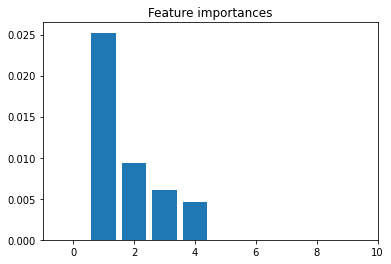

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_fr_reg = RandomForestRegressor(n_estimators=100, 
                            criterion='mse', max_depth=5, 
                            max_features='auto',
                            n_jobs=4, random_state=31, ) 
fit_res = random_fr_reg.fit(processed_data,y_DF)
importances = random_fr_reg.feature_importances_ 
# sort the importances in descending order - from most important to least important 
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(len(indices)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure()
plt.title("Feature importances")
# rescaling the data
plt.bar(range(1,10), importances[indices[range(1,10)]]) 
plt.xlim([-1, 10])
plt.show()

# **Filling NaN values using bfill()**

In [ ]:
# fill missing values along rows using backward fill
merged_sales_test.drop(["Store","Id"], axis=1).bfill(axis = 'rows').isnull().sum()
test_full = merged_sales_test.drop(["Store","Id"], axis=1).bfill(axis = 'rows').dropna()
print(test_full.shape)

(41203, 15)


In [ ]:
numeric_cols_test = test_full.select_dtypes(exclude=['object', 'datetime64']).columns
category_cols_test = test_full.select_dtypes(exclude=['int64', 'float64', 'datetime64']).columns
# only perform scaling of the data
numeric_test_transformer = Pipeline(steps=[('scaler', StandardScaler())])
test_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, category_cols_test),
    ('num_trans', numeric_test_transformer, numeric_cols_test)]) 
processed_test_data = test_preprocessor.fit_transform(test_full)
print(processed_test_data.shape)

(41203, 70)


# **PREDICTION USING RANDOM FOREST REGRESSOR**

In [ ]:
# generating sales values for the training dataset
sales_predictions = random_fr_reg.predict(processed_data)
print(sales_predictions.shape)

(1017209,)


# **Metrics**

In [ ]:
# Calculate the absolute errors
errors = abs(sales_predictions - y_DF)
# Print out the mean absolute error (mae)
mae = round(np.mean(errors), 2)
print('Mean Absolute Error:', '$',mae)

Mean Absolute Error: $ 876.44


In [ ]:
print(f"The average sales for each day is $ {round(np.mean(merged_train_dataset.groupby('Date').sum()['Sales']),2)}")

The average sales for each day is $ 6234798.96


In [ ]:
!pip install forestci

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from forestci import random_forest_error
rf_error =random_forest_error(random_fr_reg, processed_data, processed_test_data, inbag=None,
                               calibrate=True, memory_constrained=False, memory_limit=None)
print(rf_error)

ValueError: ignored

In [ ]:
import pickle
import datetime
  
# get current date and current time - UTC
current_time = datetime.datetime.now()
# Save the trained model as a pickle string.
fileName = current_time.strftime("%d-%m-%Y-%H:%M:%S:%f")+'.pkl'
# saves to my current directory in google drive
# Option: %cd /content/drive/MyDrive/Datasets/PharmaSalesCSV/
with open(fileName, 'wb') as f:
    pickle.dump(random_fr_reg, f)

# **PREDICTIONS USING LSTM-RNN**

In [ ]:
!pip3 install torch-tensorrt -f https://github.com/pytorch/TensorRT/releases

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://github.com/pytorch/TensorRT/releases
     |████████████████████████████████| 11.6 MB 8.5 MB/s 


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
seq_length = 4
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forwardLearning(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size, self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size, self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [ ]:
num_epochs = 2
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 2

num_classes = 1
# modifying dataframes to acceptable input for lstm model 
train_X = Variable(torch.from_numpy(processed_data.toarray()))
train_Y = Variable(torch.Tensor(np.array(merged_train_dataset["Sales"])))
# initialize the LSTM model using above inputs as parameters
lstm_model = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # use mean-squared error for regression
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm_model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm_model(train_X, 
                        lstm_model.forwardLearning(torch.from_numpy(processed_data.to_array())))
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, merged_train_dataset["Sales"])
    
    loss.backward()
    
    optimizer.step()
    if epoch % 2 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

AttributeError: ignored